In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *
import math
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image

In [4]:
with MPRester("xAixBxXBVwN8D32SEfC8") as m:
    structure = m.get_phonon_bandstructure_by_material_id("mp-10378")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



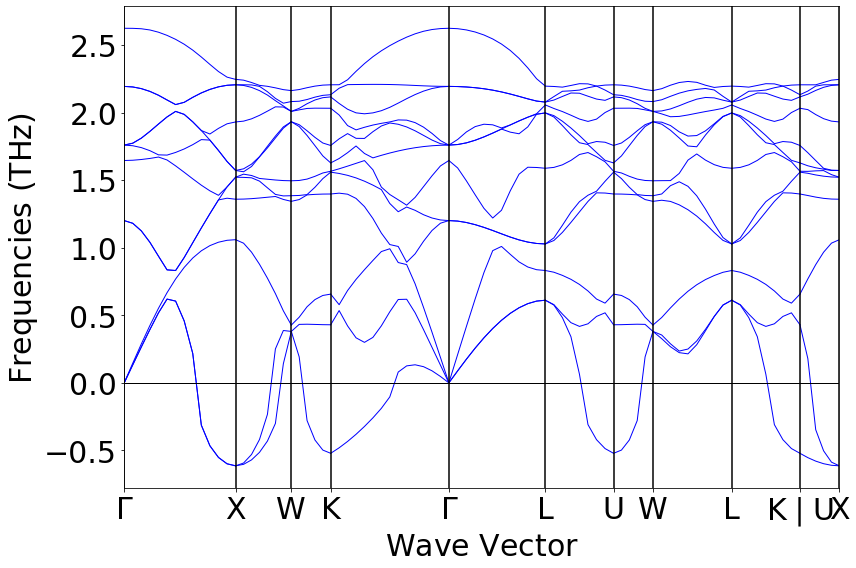

In [5]:
bsplot = PhononBSPlotter(structure)
bsplot.show()

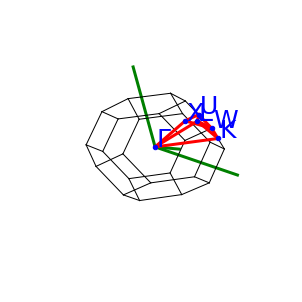

In [6]:
bsplot.plot_brillouin()

In [14]:
frequence = bsplot.bs_plot_data().get('frequency')
directions = bsplot.bs_plot_data().get('ticks').get('label')
onde = bsplot.bs_plot_data().get('distances')
branche_acc = [] ; z = [] ; p = [] 
curseur = 0
f = len(frequence)
ff = len(frequence[i])

for i in range(f):
    for j in range(ff):
        
        if (frequence[i][j][0] == 0) and (j not in branche_acc) and (i not in z):
            z.append(i)
            branche_acc.append(j)
            p.append((0,1))
            curseur += 1
            break
        elif (frequence[i][j][-1] == 0) and (j not in branche_acc) and (i not in z):
            z.append(i)
            branche_acc.append(j)
            p.append((-2,-1))
            curseur += 1
            break
    
    if curseur == 3:
        break

 

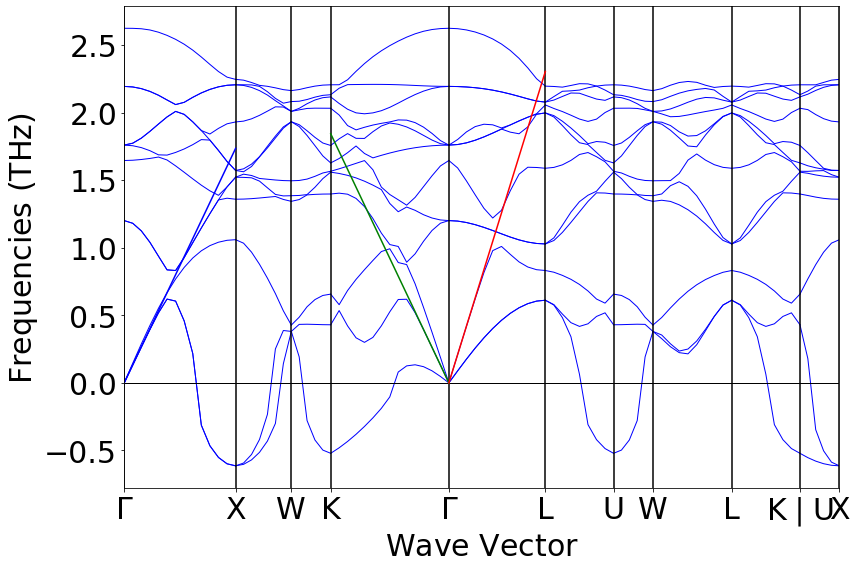

In [15]:
tan = [] ; abs = [] ; coef = []     

for i in range(3):  
    points = np.array([frequence[z[i]][branche_acc[i]][p[i][0]],
                       frequence[z[i]][branche_acc[i]][p[i][1]]])
    abscisses = np.array([onde[z[i]][p[i][0]], onde[z[i]][p[i][1]]])
    coef.append(np.polyfit(abscisses,points,1))
    abs.append(np.linspace(onde[z[i]][0],onde[z[i]][-1],100))
    tan.append(coef[i][0] * abs[i] + coef[i][1])
    

bsplot.get_plot()
plt.plot(abs[0], tan[0], color = 'blue')
plt.plot(abs[1], tan[1], color = 'green')
plt.plot(abs[2], tan[2], color = 'red')
plt.show()